In [1]:
# Executed on Windows w/ Python 3.5.
# pyscreenshot (the replacement for ImageGrab) is available through
# pip install pyscreenshot
# https://pypi.python.org/pypi/pyscreenshot
from scipy import misc #for image grayscale conversion
import pyscreenshot as ImageGrab
import matplotlib.pyplot as plt
import numpy as np #
import os #For directory commands
import PIL.Image
print("Initial directory:\t",os.getcwd())
os.chdir('C:/machineLearning/pyscreenshot/')
print("Changing to:\t\t",os.getcwd());

Initial directory:	 C:\Users\weezi
Changing to:		 C:\machineLearning\pyscreenshot


In [9]:
#This cell is trash/abandoned for a better method. Keeping for references.

#http://stackoverflow.com/questions/14788036/python-win32api-sendmesage
#http://stackoverflow.com/questions/4320417/how-to-get-hwnd-in-win32
#http://stackoverflow.com/questions/7142342/get-window-position-size-with-python


#http://stackoverflow.com/questions/25257274/python-3-4-importerror-no-module-named-win32api
#http://docs.activestate.com/activepython/2.4/pywin32/win32api.html
from win32 import win32api

import win32gui, re
whndl = win32gui.EnumWindows
print(type(whndl))
class WindowMgr:
    """Encapsulates some calls to the winapi for window management"""
    def __init__ (self):
        """Constructor"""
        self._handle = None
        print(self._handle)
    def _window_enum_callback(self, hwnd, wildcard):
        '''Pass to win32gui.EnumWindows() to check all the opened windows'''
        if re.match(wildcard, str(win32gui.GetWindowText(hwnd))) != None:
            self._handle = hwnd
            print(self._handle)
    def find_window_wildcard(self, wildcard):
        self._handle = None
        win32gui.EnumWindows(self._window_enum_callback, wildcard)
        print(self._handle)
    def getWinName(self):
        pass
w = WindowMgr()
w.find_window_wildcard(".*Hello.*")
print(w)


<class 'builtin_function_or_method'>
None
None


In [2]:
#Gets bounding box (bbox) of SNES window.
import win32gui, pywinauto, re
import pyscreenshot as ImageGrab
pat = re.compile('.*Snes9X.*')
hwnd = pywinauto.findwindows.find_windows(title_re=pat)
snesbbox = win32gui.GetWindowRect(hwnd[0])
print(snesbbox)

(862, 158, 1819, 1030)


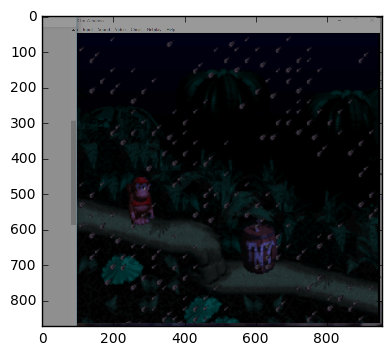

In [3]:
im = ImageGrab.grab(bbox=snesbbox)

plt.imshow(im)
plt.show()

In [37]:
#I'm curious how long it takes to grab an image. Let's test it.
from time import time
t0 = time()
im = ImageGrab.grab(bbox=snesbbox)
t1 = time()
print(t1-t0) #about 250ms

#How much does the duration depend on window size?
#Tripling bbox size increases duration by about 25%




0.3885486125946045


In [38]:
#Explore speed of getting screenshots via win32api library (bitmaps)
#http://stackoverflow.com/questions/12590942/is-there-any-better-way-to-capture-the-screen-than-pil-imagegrab-grab

import win32gui, win32ui, win32con, win32api
# hwin = win32gui.GetDesktopWindow()
#width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
#height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
#left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
#top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)
#hwindc = win32gui.GetWindowDC(hwin)
srcdc = win32ui.CreateDCFromHandle(hwindc)
memdc = srcdc.CreateCompatibleDC()
bmp = win32ui.CreateBitmap()
bmp.CreateCompatibleBitmap(srcdc, width, height)
memdc.SelectObject(bmp)
memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
bmp.SaveBitmapFile(memdc, 'screenshot.bmp')

NameError: name 'hwindc' is not defined

In [ ]:
#Explore speed of getting screenshots through issuing screenshot command to window, and grabbing resultant file.


(764694, 40, 40)


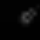

In [6]:
from sklearn.feature_extraction import image
#im.width #height:610, width:677
stdim = np.asarray(im.convert('L'))
#print(stdim.shape)
patches = image.extract_patches_2d(stdim,(40,40))
print(patches.shape)
#imageFromPatch = PIL.Image.new('L',(20,20))
imageFromPatch = PIL.Image.fromarray(patches[60000])
imageFromPatch